# Random Forest To predict Car Acceptability

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
car_df = pd.read_csv('car.csv')

## EDA

In [3]:
car_df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Let us describe the data and check the number of unique values for each column and the most frequent value in each column

In [5]:
car_df.describe()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


The target column <b>Car_Acceptability</b> has four unique entries and the most common is unacc (unacceptable)

We then check for missing and duplicate values

In [6]:
car_df.isna().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

In [7]:
car_df.duplicated().sum()

0

The dataset has zero missing values and none of the values are duplicated. 

## Data manipulation

First we have to encode the text data into numbers that we can feed into the model. For this we will use the labelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
for column in car_df.columns:
    car_df[column] = label_encoder.fit_transform(car_df[column])

In [10]:
car_df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


#### correlation

In [11]:
car_corr = car_df.corr()
car_corr

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
Buying_Price,1.000000e+00,-3.436808e-16,-2.097088e-16,-4.089152e-17,-1.691262e-16,-2.439415e-16,0.051424
Maintenance_Price,-3.436808e-16,1.000000e+00,-6.466021e-17,-4.272143e-17,-1.549092e-16,-1.404810e-16,0.040194
No_of_Doors,-2.097088e-16,-6.466021e-17,1.000000e+00,1.956599e-17,-1.942523e-17,1.062757e-16,-0.031327
Person_Capacity,-4.089152e-17,-4.272143e-17,1.956599e-17,1.000000e+00,3.854941e-18,3.392348e-17,-0.299468
Size_of_Luggage,-1.691262e-16,-1.549092e-16,-1.942523e-17,3.854941e-18,1.000000e+00,-1.541976e-17,0.033184
Safety,-2.439415e-16,-1.404810e-16,1.062757e-16,3.392348e-17,-1.541976e-17,1.000000e+00,-0.021044
Car_Acceptability,5.142422e-02,4.019365e-02,-3.132740e-02,-2.994683e-01,3.318432e-02,-2.104372e-02,1.000000


Checking for the minimum correlation

In [12]:
car_corr.min().min()

-0.2994682978188095

To visualize the the correlation we cal use a heatmap 

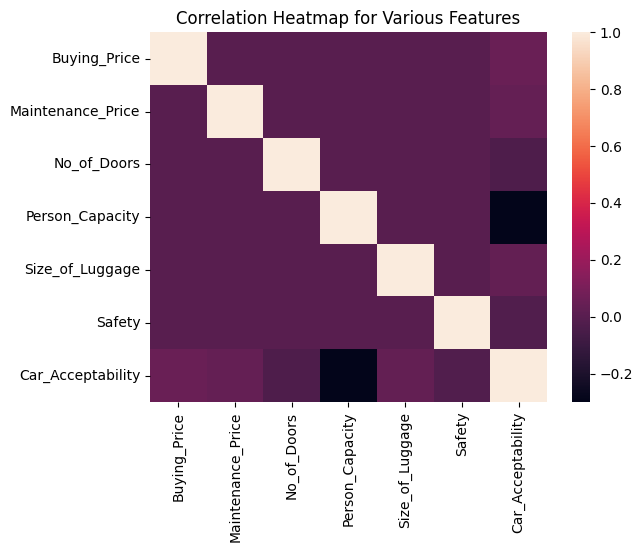

In [13]:
sns.heatmap(car_corr)
plt.title('Correlation Heatmap for Various Features')
plt.show()

Using a pairplot to show how various features interact with each other 

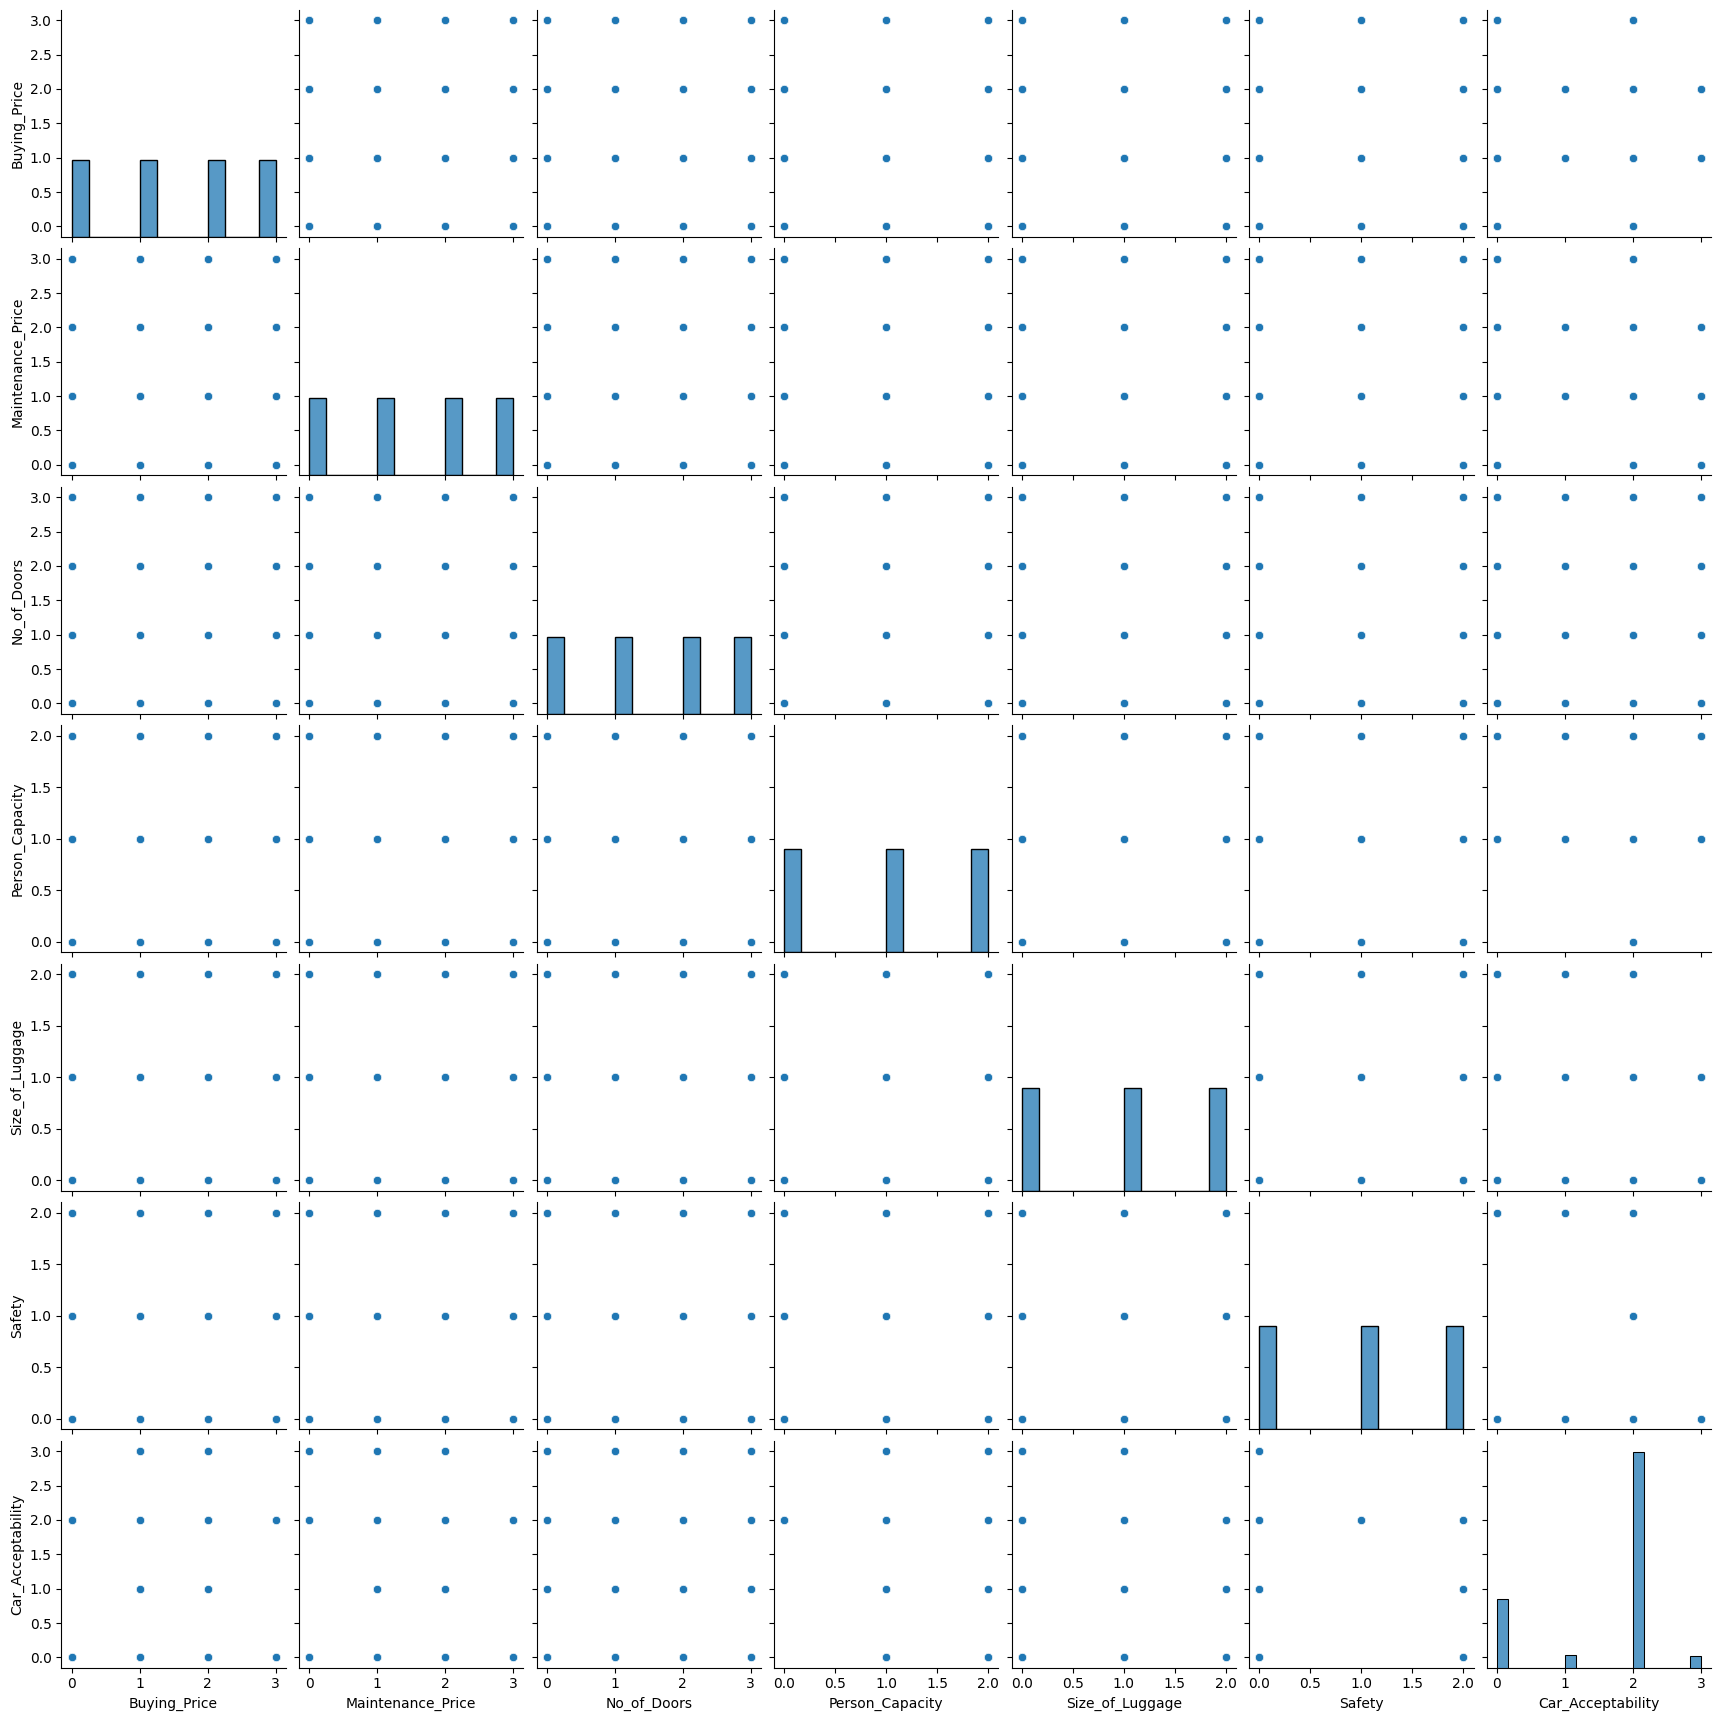

In [14]:
sns.pairplot(car_df)

## Modelling

select the independent(X) features and dependant(y) features 

In [15]:
X = car_df.drop(['Car_Acceptability'], axis=1)
X

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [16]:
y = car_df['Car_Acceptability']
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: Car_Acceptability, Length: 1728, dtype: int64

Since the random forest algorithm derives small data samples from the dataset that are used to train individual trees then we don't need to scale the data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
random_forest_classfier_1 = RandomForestClassifier()

In [21]:
random_forest_classfier_1.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_predict_1 = random_forest_classfier_1.predict(X_test)
y_predict_1

array([2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 3, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

### Performance Metrics for verison 1 of the model

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, accuracy_score

In [24]:
accuracy = accuracy_score(y_test, y_predict_1)
MAE = mean_absolute_error(y_test, y_predict_1)
MSE = mean_squared_error(y_test, y_predict_1)
RMSE = np.sqrt(MSE)

print( {
'accuracy' : accuracy,   
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE
})

{'accuracy': 0.9730250481695568, 'MAE': 0.046242774566473986, 'MSE': 0.09633911368015415, 'RMSE': 0.3103854276221004}


The acuracy for the model is about <b> 96.72% </b> 

### Hyperparameter tuning

We are going to try to improve the accuracy of the model by doing hyperparameter tuning but in this case we are going to use the <b>validation curve</b> method. This method involved varying on feature while the other features remain constant

In [25]:
from yellowbrick.model_selection import validation_curve

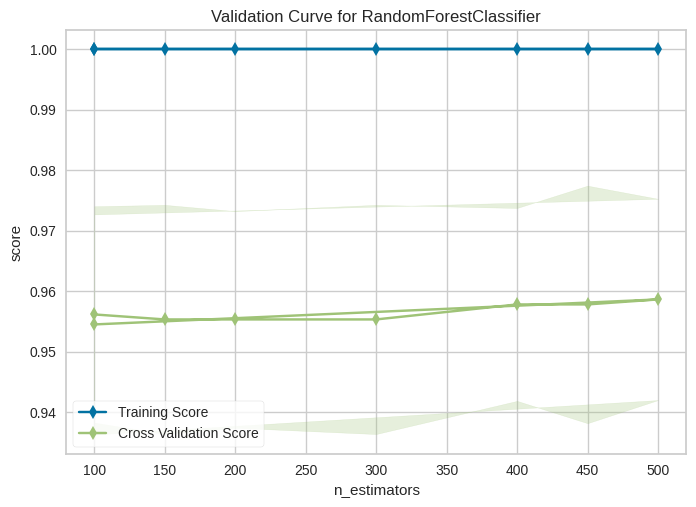

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=4, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([100, 150, 200, 300, 400, 450, 500, 100]),
                scoring='accuracy')


In [26]:
n_estimators =[100,150,200,300,400,450,500,100]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name='n_estimators', param_range=n_estimators,cv=4, scoring='accuracy'))

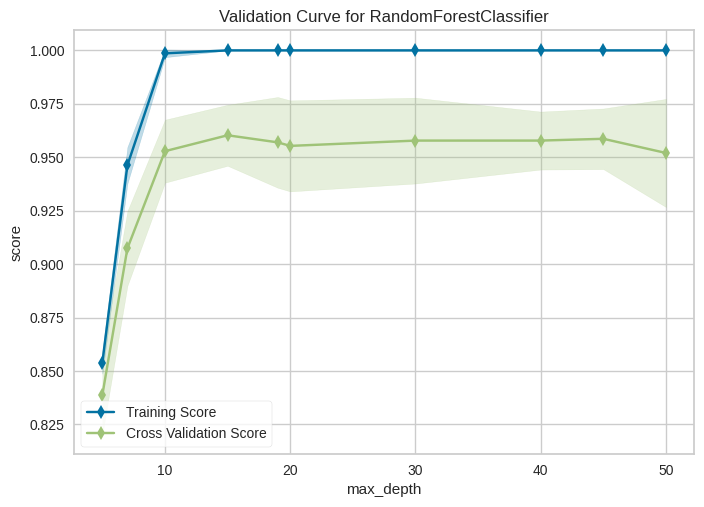

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=4, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([ 5,  7, 10, 15, 19, 20, 30, 40, 45, 50]),
                scoring='accuracy')


In [27]:
depths =[5,7,10,15,19, 20,30,40,45,50]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name='max_depth', param_range=depths,cv=4, scoring='accuracy'))

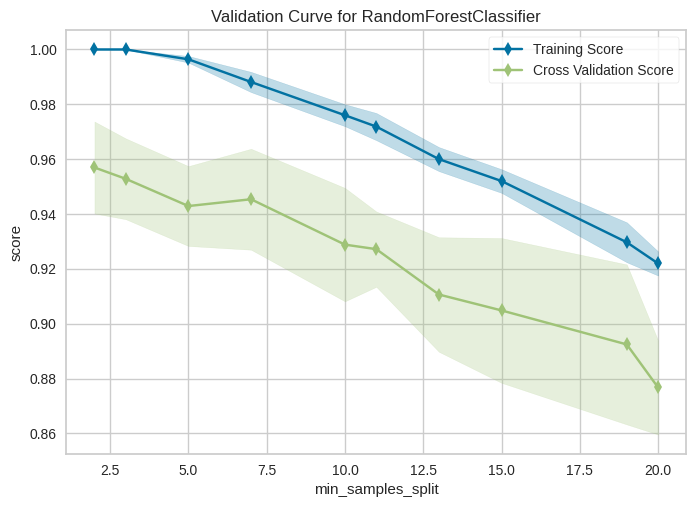

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=4, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 2,  3,  5,  7, 10, 11, 13, 15, 19, 20]),
                scoring='accuracy')


In [28]:
splits =[2, 3,5,7,10,11, 13, 15,19, 20]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name='min_samples_split', param_range=splits,cv=4, scoring='accuracy'))

We then build a new model using parameters values where the model performed best

In [29]:
random_forest_classfier_2 = RandomForestClassifier(n_estimators=450, max_depth=19,min_samples_split=3)

In [30]:
random_forest_classfier_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, min_samples_split=3, n_estimators=450)

In [31]:
y_predict_2 = random_forest_classfier_2.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_predict_2)
MAE = mean_absolute_error(y_test, y_predict_2)
MSE = mean_squared_error(y_test, y_predict_2)
RMSE = np.sqrt(MSE)

print( {
'accuracy' : accuracy,   
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE
})

{'accuracy': 0.9672447013487476, 'MAE': 0.055876685934489405, 'MSE': 0.11753371868978806, 'RMSE': 0.3428319102560146}


The model does not exhibit any increase in accuracy 

#### Feature importance

Random forest provides for a way to check the importance of each feature as used during the model training.

In [33]:
feature_importance = random_forest_classfier_2.feature_importances_

##### Visualizing the features importance

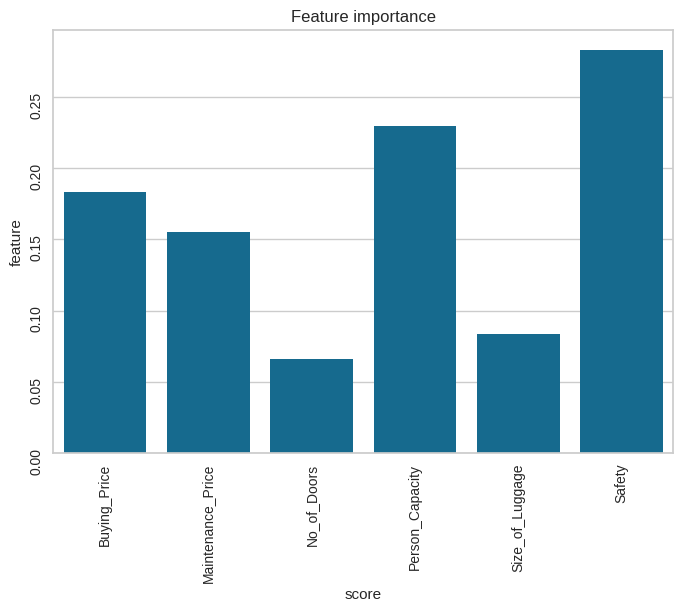

In [34]:
features = pd.Series(feature_importance, index=X_train.columns)
sns.barplot(features)
plt.title('Feature importance')
plt.xlabel('score')
plt.ylabel('feature')
plt.tick_params(rotation=90)

The <b>No_of_Doors</b> and <b>Size_of_Luggage</b> are the least important features. We can try and build another model without the two features and see how it affects the model accuracy

In [35]:
car_df.columns

Index(['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity',
       'Size_of_Luggage', 'Safety', 'Car_Acceptability'],
      dtype='object')

In [36]:
X = car_df.drop(['Car_Acceptability','No_of_Doors','Size_of_Luggage'], axis=1)
X

,Buying_Price,Maintenance_Price,Person_Capacity,Safety
0,3,3,0,1
1,3,3,0,2
2,3,3,0,0
3,3,3,0,1
4,3,3,0,2
...,...,...,...,...
1723,1,1,2,2
1724,1,1,2,0
1725,1,1,2,1
1726,1,1,2,2


In [37]:
y = car_df['Car_Acceptability']
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: Car_Acceptability, Length: 1728, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [39]:
random_forest_classfier_3 = RandomForestClassifier()

In [40]:
random_forest_classfier_3.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_predict_3 = random_forest_classfier_3.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_predict_3)
MAE = mean_absolute_error(y_test, y_predict_3)
MSE = mean_squared_error(y_test, y_predict_3)
RMSE = np.sqrt(MSE)

print( {
'accuracy' : accuracy,   
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE
})

{'accuracy': 0.8439306358381503, 'MAE': 0.29865125240847784, 'MSE': 0.626204238921002, 'RMSE': 0.7913306760899655}
